In [15]:
import os
import typing as t

import cv2
import numpy
import pytesseract
from PIL import Image
import matplotlib.pyplot as plt

In [10]:
# Constants
BASE_DATA_PATH = 'SROIE2019'
DATA_PATH_TEST = BASE_DATA_PATH + os.sep + 'test'
DATA_PATH_TEST_IMG = DATA_PATH_TEST + os.sep + 'img'
DATA_PATH_TEST_BOX = DATA_PATH_TEST + os.sep + 'box'
DATA_PATH_TEST_ENTITIES = DATA_PATH_TEST + os.sep + 'entities'
DATA_PATH_TRAIN = BASE_DATA_PATH + os.sep + 'train'
DATA_PATH_TRAIN_IMG = DATA_PATH_TRAIN + os.sep + 'img'
DATA_PATH_TRAIN_BOX = DATA_PATH_TRAIN + os.sep + 'box'
DATA_PATH_TRAIN_ENTITIES = DATA_PATH_TRAIN + os.sep + 'entities'

# Meta configuration
with os.popen('which tesseract') as c:
    # Здесь нужно поменять путь вручную
    pytesseract.pytesseract.tesseract_cmd = r'/usr/local/bin/tesseract'

In [33]:
# Utils
def read_img(path: str):
    if os.path.isdir(path):
        for file_name in os.listdir(path):
            img_path = os.path.join(path, file_name)
            if os.path.isfile(img_path):
                yield cv2.imread(img_path), img_path
    elif os.path.isfile(path):
        yield cv2.imread(path), path
        
def extract_file_name(path: str):
    components = os.path.basename(path).split('.')
    return components[0]

def process_image(image, image_preproccessors: t.Optional[t.List[callable]] = None):
    if image_preproccessors:
        for preproccessor in image_preproccessors:
            image = preproccessor(image)
    
    # Copypaste
    d = pytesseract.image_to_data(image, output_type=pytesseract.Output.DICT)
    n_boxes = len(d['level'])
    for i in range(n_boxes):
        if(d['text'][i] != ""):
            (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            
    return image

4 \2 02 013,

LIM SENG THO HARDWARE TRADING
No 7, Simpdng Off Batu Village,
Jalan Ipoh Batu 5, 51200 Kuala Lumpur
MALAYSIA
Tel & Fax No : 03-6258 7191
03-6258 7191
Cornwan,; Reg No. (002227 1061-7)
GSi Reg No. 001269075968

TAX INVOICE
NVvoice M! CS 24146
Date 02/02/2018 10:06
Casnier # LST
RM Code
BEG GUNI
10.00 NOS x 070 7.00 SR
Subtotal 7.00
Total Incl. of GST 7.00
Payment : 7 00
Change Due : 0.00
Total Items). 10
GST Suminary = Amount(RM) Tax(RM)
SR @ 6% 6.60 o@o*

saekssese THANKYOU etter
“"*** PLEASE COME AGAIN ***"*
"GOODS SOLD ARE NOT RETURNABLE”

Mi




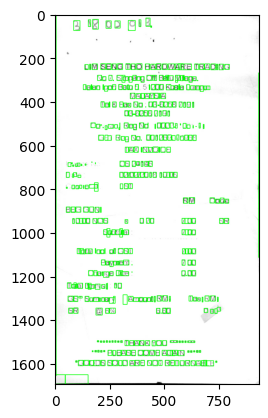

In [46]:
gen = read_img(DATA_PATH_TEST_IMG)
img, file_path = next(gen)

print(pytesseract.image_to_string(img))
process_image(img)